<a href="https://colab.research.google.com/github/MarcioB1999/Analise/blob/main/Panda_ipybn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def aux(df, tipo, make):
    dfn=df[df.Make.isin(make) & df.Type.isin(tipo)].reset_index(drop=True)
    dfn=dfn[["Make","Type","Invoice"]]
    sns.boxplot(x="Make",y="Invoice",hue="Type",data=dfn,color='blue')
    for i in tipo:
        y=df[(df.Make.isin(make)) & (df.Type==i)].reset_index(drop=True)
        y=y[["Make","Type","Invoice"]].groupby("Make").mean()
        plt.plot(make,y,label=f"""media {i}""")
    plt.legend()
    plt.title("Faturamento do Tipo por Marca")
    plt.xlabel("Marcas")
    plt.ylabel("Faturamento")
    plt.savefig('teste.png', format='png')
    plt.show()
    dfn.to_excel("dfn.xlsx")
    return dfn

In [ ]:
 
def aux2(df, tipo, make):
    dfn=df[df.Make.isin(make) & df.Type.isin(tipo)].reset_index(drop=True)
    dfn=dfn[["Make","Type","MSRP"]]
    sns.boxplot(x="Make",y="MSRP",hue="Type",data=dfn,color='blue')
    for i in tipo:
        y=df[(df.Make.isin(make)) & (df.Type==i)].reset_index(drop=True)
        y=y[["Make","Type","MSRP"]].groupby("Make").mean()
        plt.plot(make,y,label=f"""media {i}""")
    plt.legend()
    plt.title("Preço de Varejo do Tipo por Marca")
    plt.xlabel("Marcas")
    plt.ylabel("Preço de Varejo")
    plt.savefig('teste.png', format='png')
    plt.show()
    dfn.to_excel("dfn.xlsx")
    return dfn

In [ ]:
def aux1(df, make, tipo):
    #uma marca nao tem o msm modelo
    #d outra marca. Mesma coisa pro
    #tipo de carro, que tipos diferentes
    #nao tem msm modelo. Portanto ao fazer
    #drop_duplicates, e um tipo aparece
    #n vezes para uma marca, logo tem
    #n modelos para ele dessa marca.
    dfn=df[df.Make.isin(make) & df.Type.isin(tipo)].reset_index(drop=True)
    dfn.drop_duplicates("Model",inplace=True)
    sns.histplot(data=dfn[["Make","Type"]],x="Type",hue="Make",multiple="stack")
    plt.xlabel("Tipo")
    plt.ylabel("Qtd Modelo")
    plt.title("Qtd de Modelo de um Tipo por Marca")
    plt.show()

obs: existem vários modelos 
 pro mesmo tipo


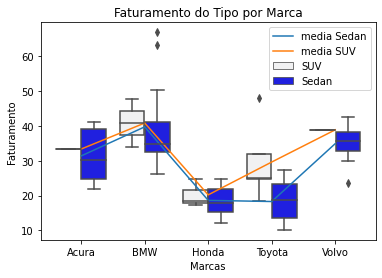

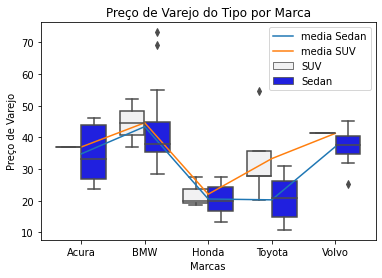

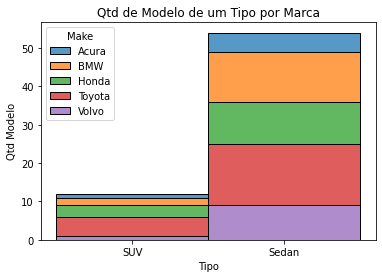

In [ ]:
df=pd.read_csv("cars.csv")
df[["MSRP","Invoice"]]= df[["MSRP","Invoice"]].replace({'\$':'', ',':'.'}, regex=True).astype(float)
#print(df["Make"].drop_duplicates())
#print(df["Type"].drop_duplicates())
make=["Acura","Toyota","BMW","Honda","Volvo"]
tipo=["Sedan","SUV"]
print("obs: existem vários modelos \n pro mesmo tipo")
aux(df,tipo,make)
aux2(df,tipo,make)
aux1(df, make,tipo)